<a href="https://colab.research.google.com/github/dhruvsaxena11/Emotion-In-Voice-Recognition/blob/main/Emotion_Recognition_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd
df_train=pd.DataFrame(dataset["train"])
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


<Axes: title={'center': 'label'}, ylabel='Frequency'>

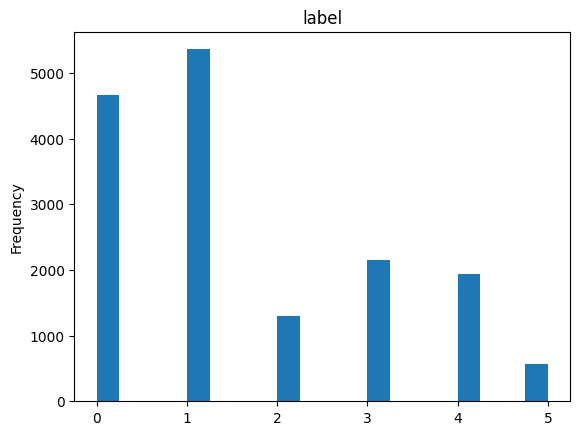

In [ ]:
# @title label

from matplotlib import pyplot as plt
df_train['label'].plot(kind='hist', bins=20, title='label')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_test=pd.DataFrame(dataset["test"])
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


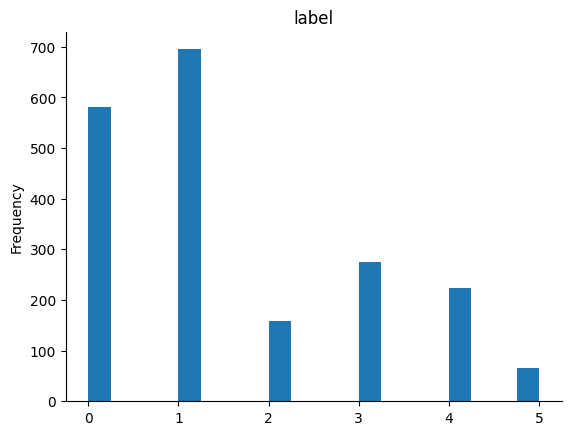

In [ ]:
# @title label

from matplotlib import pyplot as plt
df_test['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset.keys()

dict_keys(['train', 'validation', 'test'])

In [ ]:
df_valid=pd.DataFrame(dataset["validation"])
df_valid.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [ ]:
import numpy as np

train_label=np.array(df_train.label)
test_label=np.array(df_test.label)
valid_label=np.array(df_valid.label)

In [ ]:
# Assuming df_train.text is a Pandas Series
train_text = df_train.text.tolist()
test_text = df_test.text.tolist()
valid_text = df_valid.text.tolist()

<Axes: >

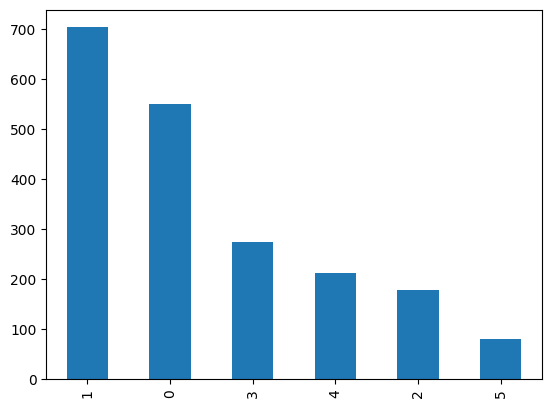

In [ ]:
# @title Label Value Distribution

df_valid['label'].value_counts().plot(kind='bar')

In [ ]:
print(df_train.shape)
print(df_test.shape)
print(df_valid.shape)

(16000, 2)
(2000, 2)
(2000, 2)


In [ ]:
labels={0:"sadness",1:"joy",2:"love",3:"anger",4:"fear",5:"surprise"}
labels2={"sadness":0,"joy":1,"love":2,"anger":3,"fear":4,"surprise":5}

In [ ]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(df_train.label)
one_hot_valid_labels = to_categorical(df_valid.label)
one_hot_train_labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf
# Reshape the labels to match the model's output shape
one_hot_train_labels = tf.reshape(one_hot_train_labels, (-1, 2))
one_hot_valid_labels = tf.reshape(one_hot_valid_labels, (-1, 2))
one_hot_train_labels

<tf.Tensor: shape=(48000, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
tokenized_data_train = tokenizer(train_text, return_tensors="np", padding=True)
tokenized_data_valid = tokenizer(valid_text, return_tensors="np", padding=True)


{'input_ids': array([[    0,   118, 46405, ...,     1,     1,     1],
       [    0,   118,    64, ...,     1,     1,     1],
       [    0,   757, 16004, ...,     1,     1,     1],
       ...,
       [    0,   118,   619, ...,     1,     1,     1],
       [    0,   118,   619, ...,     1,     1,     1],
       [    0,   118,   216, ...,     1,     1,     1]]), 'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])}

In [ ]:
train_label.shape

(16000,)

In [ ]:
# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data_train = dict(tokenized_data_train)
tokenized_data_valid = dict(tokenized_data_valid)

# labels = np.array(dataset["label"])

In [ ]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf

# Load pre-trained BERT model
model = TFAutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-uncased",num_labels=6, ignore_mismatched_sizes=True)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.layers[0].trainable=False

In [ ]:
for layer in model.layers:
    print(layer)

In [ ]:
model.layers


In [ ]:
from transformers import AutoConfig

# Load pre-trained BERT model
# model = TFAutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

# Load model configuration
# config = AutoConfig.from_pretrained("SamLowe/roberta-base-go_emotions")

# Define the number of classes in your downstream task
num_classes_downstream = 6  # Replace with the actual number of classes in your task

# Replace the classifier layer with a new one for your task
# model.config.num_labels = num_classes_downstream
model.classifier = tf.keras.layers.Dense(num_classes_downstream, activation='softmax')

# Continue with fine-tuning and model compilation

In [ ]:
model.classifier

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  4614      
                                                                 
Total params: 109486854 (417.66 MB)
Trainable params: 4614 (18.02 KB)
Non-trainable params: 109482240 (417.64 MB)
_________________________________________________________________


In [ ]:
model.config.id2label=labels
model.config.label2id=labels2

In [ ]:
model.logits

In [ ]:
# Compile the model with the optimizer and loss function
model.compile(optimizer="Adam",metrics=["accuracy"])

# Assuming tokenized_data_train, train_label, tokenized_data_valid, and valid_label are defined
model.fit(tokenized_data_train, train_label, epochs=30, validation_data=(tokenized_data_valid, valid_label))


Epoch 1/30


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
500/500 [==============================] - 160s 231ms/step - loss: 1.5292 - accuracy: 0.3980 - val_loss: 1.4836 - val_accuracy: 0.4350
Epoch 2/30
500/500 [==============================] - 105s 211ms/step - loss: 1.4646 - accuracy: 0.4383 - val_loss: 1.4343 - val_accuracy: 0.4905
Epoch 3/30
500/500 [==============================] - 105s 210ms/step - loss: 1.4269 - accuracy: 0.4589 - val_loss: 1.3767 - val_accuracy: 0.4950
Epoch 4/30
500/500 [==============================] - 105s 210ms/step - loss: 1.4040 - accuracy: 0.4663 - val_loss: 1.3811 - val_accuracy: 0.4720
Epoch 5/30
500/500 [==============================] - 105s 211ms/step - loss: 1.3977 - accuracy: 0.4657 - val_loss: 1.3584 - val_accuracy: 0.5060
Epoch 6/30
500/500 [==============================] - 105s 210ms/step - loss: 1.3885 - accuracy: 0.4683 - val_loss: 1.3493 - val_accuracy: 0.50

In [ ]:
val=tokenizer(["hello boys I am good"],padding=True,return_tensors="np")

In [ ]:
import tensorflow as tf

# Assuming 'val' is your input data
predictions = loaded_model.predict(val)

# Extract logits from predictions
logits = predictions[0]  # Assuming logits are the first element in the tuple

# Apply softmax using tf.nn.softmax
probabilities = tf.nn.softmax(logits)

# Now 'probabilities' contains the softmax probabilities
print(probabilities.numpy())


1/1 [==============================] - 0s 86ms/step


AttributeError: 'tuple' object has no attribute 'rank'

In [ ]:
model.save_pretrained("/content/sample_data/emotion_model_dhruv")


In [ ]:
from google.colab import files

# Specify the file path
file_path = '/content/sample_data/emotion_model_dhruv'  # Adjust the file path accordingly

# Download the file
files.download(file_path)


In [ ]:
import shutil

# Specify the directory to be copied
directory_to_copy = '/content/sample_data/emotion_model_dhruv'  # Adjust the directory path accordingly

# Specify the destination directory in Google Drive
destination_directory = '/content/drive/My Drive/'

# Copy the directory to Google Drive
shutil.copytree(directory_to_copy, os.path.join(destination_directory, os.path.basename(directory_to_copy)))


'/content/drive/My Drive/emotion_model_dhruv'

In [ ]:
from transformers import TFBertForSequenceClassification

# Load the fine-tuned model from the saved directory
loaded_model = TFBertForSequenceClassification.from_pretrained("/content/sample_data/emotion_model_dhruv")


Some layers from the model checkpoint at /content/sample_data/emotion_model_dhruv were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/sample_data/emotion_model_dhruv.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
my=dict(tokenizer(["hello boys I am good"],padding=True,return_tensors="np"))
my

{'input_ids': array([[ 101, 7592, 3337, 1045, 2572, 2204,  102]]),
 'token_type_ids': array([[0, 0, 0, 0, 0, 0, 0]]),
 'attention_mask': array([[1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# Assuming my['input_ids'], my['token_type_ids'], and my['attention_mask'] are your input tensors
input_ids = my['input_ids']
token_type_ids = my['token_type_ids']
attention_mask = my['attention_mask']

# Make predictions using the loaded model, setting verbose=0 or verbose=1
# predictions = loaded_model.predict([input_ids, token_type_ids, attention_mask], verbose=0)
# or
predictions = loaded_model.predict([input_ids, token_type_ids, attention_mask], verbose=1)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'tf_bert_for_sequence_classification' (type TFBertForSequenceClassification).
    
    Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (11 total):
        * (<tf.Tensor 'input_ids:0' shape=(None, 7) dtype=int64>,
     <tf.Tensor 'input_ids_1:0' shape=(None, 7) dtype=int64>,
     <tf.Tensor 'input_ids_2:0' shape=(None, 7) dtype=int64>)
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * False
      Keyword arguments: {}
    
     Expected these arguments to match one of the following 2 option(s):
    
    Option 1:
      Positional arguments (11 total):
        * {'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name='attention_mask'),
     'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name='input_ids_input_ids'),
     'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name='token_type_ids')}
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * True
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (11 total):
        * {'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name='attention_mask'),
     'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name='input_ids_input_ids'),
     'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name='token_type_ids')}
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * None
        * False
      Keyword arguments: {}
    
    Call arguments received by layer 'tf_bert_for_sequence_classification' (type TFBertForSequenceClassification):
      • attention_mask=('tf.Tensor(shape=(None, 7), dtype=int64)', 'tf.Tensor(shape=(None, 7), dtype=int64)', 'tf.Tensor(shape=(None, 7), dtype=int64)')
      • token_type_ids=None
      • position_ids=None
      • head_mask=None
      • inputs_embeds=None
      • output_attentions=None
      • output_hidden_states=None
      • return_dict=None
      • labels=None
      • training=False


In [ ]:
my['input_ids'] = np.array(my['input_ids'])
my['token_type_ids'] = np.array(my['token_type_ids'])
my['attention_mask'] = np.array(my['attention_mask'])

Our Application

In [ ]:
from transformers import TFBertForSequenceClassification,AutoTokenizer


In [ ]:

# Load the fine-tuned model from the saved directory
loaded_model = TFBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/emotion_model_dhruv")
loaded_tokenizer=AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

In [ ]:
import numpy as np

In [ ]:
def predict_emotion(text):

  text_token=loaded_tokenizer(text,padding=True,return_tensors="np")
  outputs=loaded_model(text_token)
  probabilities = tf.nn.softmax(outputs.logits)
  final=probabilities.numpy()
  labels=["sadness","joy","love","anger","fear","surprise"]
  final=final.tolist()
  result_dict = {k: v for k, v in zip(labels,final[0])}
  return result_dict




In [ ]:
predict_emotion("dhruv")

{'sadness': 0.20766790211200714,
 'joy': 0.5023493766784668,
 'love': 0.14493463933467865,
 'anger': 0.07614676654338837,
 'fear': 0.058175139129161835,
 'surprise': 0.010726136155426502}

In [ ]:
my_labels=["sadness","joy","love","anger","fear","surprise"]

In [ ]:
import tensorflow as tf # Apply softmax using tf.nn.softmax


[[10.26997    70.72344     9.102875    6.3824987   3.4056108   0.11560599]]


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [ ]:
import gradio as gr
inputs = gr.Textbox(lines=1, label="Input Text")
outputs = gr.Label(num_top_classes=6)
interface = gr.Interface(fn=predict_emotion, inputs=inputs, outputs=outputs)
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://687af3e86445c0a209.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
